# 인공지능으로 세상에 없던 새로운 패션 만들기

## 학습 목표
---
- 생성 모델링 개념을 이해하며 판별 모델링과의 차이 알기
- Pix2Pix, CycleGAN 등의 이미지 관련 다양한 생성 모델링의 응용을 접하며 흥미 가지기
- Fashion MNIST 데이터셋의 의미를 알기
- 생성적 적대 신경망(GAN)의 구조와 원리를 이해하기
- 텐서플로우로 짠 DCGAN 학습 코드를 익히며 응용하기

## 목차
---
1. 없던 데이터를 만들어낸다, 생성 모델링
2. 여러 가지 생성 모델링 기법과 친해지기
3. 패션을 디자인하려면? 먼저 패션을 배워야지!
4. 그림을 만들어내는 화가 생성자(Generator), 그리고 평가하는 비평가 구분자(Discriminator)
5. 생성 모델이 똑똑해지기 위한 기나긴 여정
6. 프로젝트 : CIFAR-10 이미지 생성하기


## 1. 없던 데이터를 만들어낸다, 생성 모델링
---
Generative Modeling이라는 생성 모델링을 실습해보자.

생선 모델링은 지금까지 접했던 분류하는 판별 모델링(Discriminative modeling)과 다른 점이 많다.
- 판별 모델 : 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞히는 모델
- 생성 모델 : 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델로 정리할 수 있습니다.

아마존에서 만들어낸 DeepComposer는 생성자와 구분자 네트워크를 사용하여 작곡 생성 모델을 만들었다.
- 생성자 : 오케스트라처럼 직접 음악을 연주하여 만들어내는 모델
- 구분자 : 오케스트라가 연주한 음악을 평가하여 오케스트라가 만들어 내는 음악이 점점 더 좋아지게 만드는 지휘자의 역할을 하는 모델

## 2. 여러 가지 생성 모델링 기법과 친해지기
### 2-1 Pix2Pix
---
DeepComposer말고도 다양한 생성 모델링이 사용되고 있다. 간단한 모델부터 아주 복잡한 생성 모델링이 있는데, 간단한 Pix2Pix를 통해 그림을 사진으로 바꿔보자.

Pix2Pix는 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 하는 모델로, 입력 이미지와 실제 이미지를 쌍으로 데이터셋을 구축하여 학습을 진행한다.
입력이미지를 통해 이미지 예측을 평가하면서 실제와 같은 모양을 만드는데 이미지의 픽셀단위로 변화시킨다고 pixel to pixel, Pix2Pix라 부른다.
![Pix2Pix](https://d3s0tskafalll9.cloudfront.net/media/images/pix2pix.max-800x600.png)
위의 예측값을 보면 그럴듯하게 예측해낸다.

![Pix2Pix응용논문](https://arxiv.org/pdf/1611.07004.pdf)
논문을 한번 살펴보자.

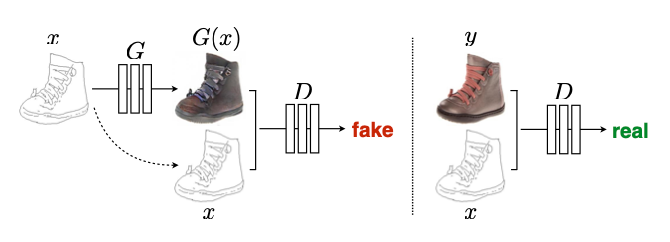
위 논문에서 Generator는 'U-Net'을 기반 아키텍쳐를 사용했고, Discriminator는 이미지 패치들의 규모를 조정하는 'PatchGAN' 분류기를 썼다.

- GAN은 임의의 노이즈 백터 z를 생성자에 넣어 결과 이미지 y를 출력한다.
- cGAN은 이미지로 학습된 매핑과 임의의 노이즈 백터z를 생성자에 넣어서 결과 이미지 y를 출력한다.

논문에서는 이러한 네트워크는 다양하게 적용할 수 있다는 장점이 있다고 한다.
- 그림을 사진으로 만들어 준다거나
- 흑백 사진을 RGB 사진으로 바꿔준다.
- 위성사진으로 도로와 건물을 구분하여 지도로 만들어주며
- 낮에 찍힌 사진을 밤에 찍은 사진처럼 만들어주기도 한다.

### 2-2 CycleGAN
---
단방향으로 생성이 가능했던 Pix2Pix에서 양방향으로 생성하도록 발전된 형태가 나왔다. 그 중 하나인 CycleGAN을 사용하면 그림을 사진으로, 사진을 그림으로 바꿔줄 수 있다.
얼룩말 사진을 말 사진으로 변환하는 것을 학습시킨다면, 말 사진을 입력하면 얼룩말로 바꿔준다는 것이다.
![CycleGAN]https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN.max-800x600.png)

이러한 특징 떄문에, 유명한 화가의 화풍을 사진으로 바꿔주도록 학습시키고, 사진을 넣어 그 화가의 그림으로 바꿔줄 수 있다. 즉, 사진을 넣어주면, 모네, 피카소, 반고흐가 그린 그림처럼 만들어 준다.

또 발전된 점으로, Pix2Pix는 입력 데이터와 출력 데이터끼리 쌍으로 이루어진 데이터셋이 필요하지만, CycleGAN은 필요 없다.

### 2-3 Neural Style Transfer
---
이미지의 스타일을 바꿔주는 기능의 모델링 기법을 보자. 전체 이미지 구성은 유지하면서 약간의 스타일을 바꿔주는 것이다.
Base이미지에서 구성요소를 가져오고, style이미지에서 스타일만 추출해서 신경망을 통해 합쳐주는 방식이다.
아래 결과들을 보자.
![NST](https://d3s0tskafalll9.cloudfront.net/media/images/StyleTransfer.max-800x600.png)

## 3-1 패션을 디자인하려면? 먼저 패션을 배워야지!
---
사람이 패션을 디자인 하기위해서 패션을 배우는 것처럼, 생성모델 인공지능도 다양한 패션을 학습해야 만들어 낼 수 있다.
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 활용해서 학습해보자.

### Fashion-MNIST
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![Fashion MNIST image](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
*Fashion MNIST images*

10가지 패션 카테고리가 0~9의 숫자 Label로 표시되었다.

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

## 3-2 패션을 디자인하려면? 먼저 패션을 배워야지! 코딩하기

### 1. 모델 임포트

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


### 2. Fashion-MNIST 불러오기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### 3. Fashion-MNIST의 최대값과 최솟값 보기

In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


### 4. 정규화 시켜보기
픽셀 데이터들을 0을 중심값으로 재배치 하는 정규화를 해보자.

In [4]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
train_x.shape

(60000, 28, 28)

28x28 크기의 이미지가 60,000개가 있는 걸 확인했다.
하지만 CNN 딥러닝에 입력할 때는 채널(컬러의 종류)가 넣어져야 한다. Fashion-MNIST는 흑백이미지로 1을넣어주면 된다.

In [6]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

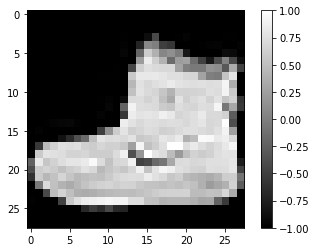

In [7]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray') # 28 x 28의 모양으로 이미지를 출력한다.
plt.colorbar() # plt.colorbar()는 정규화된 값들의 컬러바를 넣어준다.
plt.show()

train_x의 0번 인덱스 이미지는 신발이다.
10개의 이미지를 출력해보자.

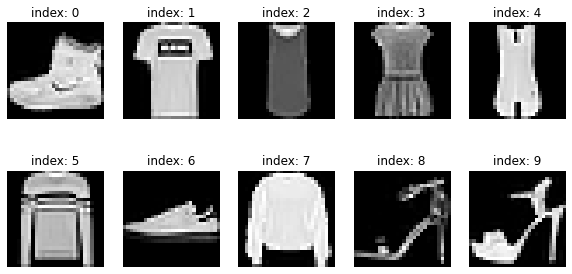

In [8]:
plt.figure(figsize=(10, 5)) # 전체 프레임의 크기를 결정

for i in range(10): #
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

무작위로 선정한 25개의 이미지를 출력해보자.

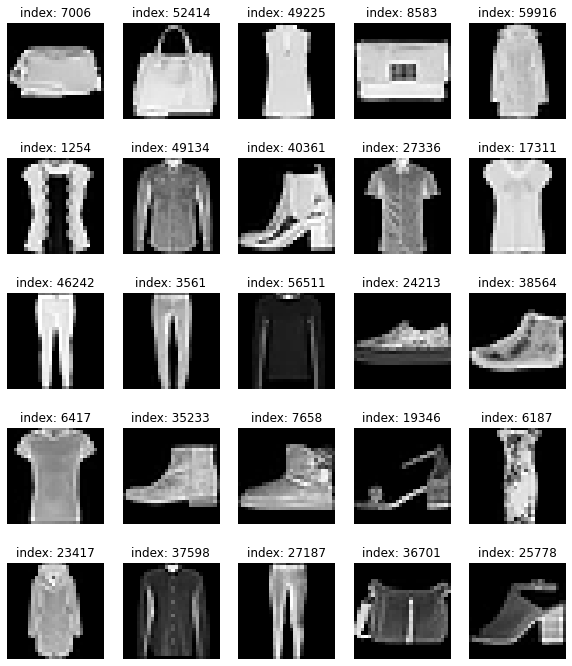

In [9]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

### 학습데이터 만들기

학습데이터를 만들어 볼건데,60,000개를 다 한번에 사용하면 메모리 활용면에서도 비효율적이며, 학습시간이 너무 커서 미치 배치 방식으로 학습한다.

In [10]:
BUFFER_SIZE = 60000 # 전체 데이터를 버퍼에 넣고 섞는다.
BATCH_SIZE = 256 # 256개씩 배치를 만든다.

이제 학습데이터를 만들어보자.

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## 4. 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 구분자 (1) GAN 이해하기

생성 모델링 기법을 앞서 살펴봤는데, 가장 간단한 GAN을 보자. GAN의 특징은 생성자와 구분자가 있다는 것이다.
최초 GAN을 발표한 논문에는 이 두 네트워크를 재미있게 비유했다.
- 생성자 : 위조지폐를 만들어내는 팀
- 구분자 : 위조 지폐범을 잡아내는 경찰

위조지폐는 구분자에게 걸리지 않도록 더 학습하며, 구분자는 위조를 더 잘 잡아내기 위해 학습시켜서 진짜와 위조를 구분할 수 없도록 하는 방식이다.
이렇게 두 네트워크가 대립하기에 Adversarial Network다.

![GAN 생성모델](https://d3s0tskafalll9.cloudfront.net/media/images/GAN.max-800x600.png)

이번에 실습할 모델을 Deep convolutional GAN, DCGAN이다.

### 생성자 모델 함수

기존의 CNN이랑 다른 것이 Conv2DTranspose 레이어를 사용한다.
(7, 7, 256) → (14, 14, 64) → (28, 28, 1) 순으로 7 x 7 크기의 이미지를 키워 최종 사이즈인 28 x 28을 만들어준다.
각 층에는 신경망의 가중치 폭발이나 가중치 소실을 막기위해 배치정규화를 해주며, 활성화 함수는 tanh()를 쓴다. 우리 정규화시킨 값들의 범위에서 출력해준다.

모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받습니다.

입력된 (batch_size, 100) 벡터는 7 x 7 x 256 = 12544개의 노드를 가진 첫 번째 Dense 레이어를 거치며 (batch_size, 12544) 형상의 벡터가 된다.

첫 번째 레이어를 지난 후 벡터는 Reshape 레이어를 지나면서 Convolutional 연산을 할 수 있도록 1차원 벡터를 (7, 7, 256) 형상의 3차원 벡터로 변환시킨다.

In [12]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

### 생성자를 만들어보자.

In [13]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

### 노이즈 만들기

tf.random.normal()을 이용해 가우시안 분포로 랜덤값을 뽑아낸다.

In [14]:
noise = tf.random.normal([1, 100])

In [15]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

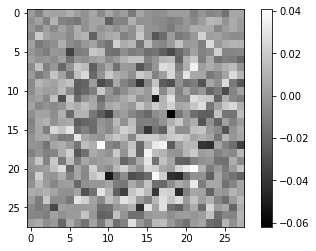

In [16]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

\[-1 :1 \] 범위의 값을 갖는 노이즈들로 가지고 28 x 28 크기로 이미지를 만들었다.

### 구분자를 구현해보자.

In [17]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [18]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [19]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00109532]], dtype=float32)>

## 생성 모델이 똑똑해지기 위한 기나긴 여정 (1) 손실함수와 최적화 함수

생성자와 판별자가 스스로 학습하면서 서로 경쟁해야하는데, 모델을 똑똑하게 하기 위해서 최적화 해보자.
먼저 손실함수를 만들자.

GAN에서 생성자의 손실함수는 fake와 real이 얼마나 차이가 나는지 정량적으로 보여주줘야 하기에교차 엔트로피를 사용한다.
판별자는 가짜인지 거짓인지 2개로만 분류하면 되기에 이진 교차 엔트로피를 사용한다.
- 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것
- 구분자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것

결국 생성자나 구분자 모두 구분자의 손실함수에 들어가는 판별값을 사용한다. 그럼 이진 교차 엔트로피 하나만 사용하면 되겠다.

#### 이진 교차 엔트로피를 만들어보자.

In [20]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#### fake와 real 백터를 만들어 넣어보자.

fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)
real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)

백터를 만들고, 백터와 같은 크기로 1을 채운 백터를 하나 만들 수 있다.

In [21]:
vector = [[1, 2, 3],
          [4, 5, 6]]

tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

이러한 방식으로 1로만 들어간 데이터와 얼마나 차이가 나는지 함수를 만들 수 있다.

생성자의 손실 함수를 만들자. 가짜 아웃풋을 넣어서 구분자가 판별한 값을 반환한다.

In [22]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

구분자의 손실함수를 구하는 함수를 만들자
실제 출력값의 손실함수와 가짜 출력값의 손실함수를 더해서 전체 손실을 구한다.

In [23]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

진짜와 가짜에 대한 정확도를 반환하는 함수도 만들어준다.

In [24]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

생성자와 구분자 모두 최적화하기 위한 최적화 함수로 Adam을 사용하며, 학습률을 '1e-4'로 한다.

In [25]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

100차원의 노이즈를 16개 만들어 백터로 만들어 주었다.

In [26]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

### 훈련 과정을 설계하자

생성자 구분자의 손실함수와 최적화 함수를 설정했고, 노이즈도 만들었다.
그럼 이제 훈련의 과정을 정리해보자.

먼저 설정한 미니배치가 진행할 train_step 함수를 만들어야 한다.

In [27]:
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [28]:
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

@tf.function 데코레이터를 넣어주었더니
파라미터에 들어온 넘파이 어레이가 텐서플로우의 텐서로 바꼈다. 이렇게 데코레이터가 사용된 함수로 출력된 값은 tf의 graph 노드가 될 수 있는 타입으로 자동 변환된다.

In [29]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

아래와 같은 4개의 값을 반환하는 train_step함수를 만들었다.
- 생성자의 손실함수 값
- 구분자의 손실함수 값
- 진짜 이미지의 정확도
- 가짜 이미지의 정확도

train_step 함수를 하나하나 뜯어보자.

1. 입력 데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음
2. 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
3. tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
4. generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성
5. discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력
6. loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
7. accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산
8. gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
9. 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신
10. 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴

In [30]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

16개의 노이즈인 샘플 시드를 받아서 생성자에 넣어서 이미지를 출력하고 저장한다.

In [31]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

위 함수는 히스토리라는 딕셔너리에 학습동안 변화하는 loss와 acc를 매번 저장해두었던 걸 출력한다.

In [32]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

정기적으로 모델을 저장하기 위한 체크포인트를 만들었다.

In [33]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

### 학습 시키기
- 배치에 1단계 훈련 과정을 담은한 train_step()과 샘플이미지를 생성하고 저장하는
- 샘플 이미지를 생성하고 저장하는 gernerate_and_save_images()
- 학습 과정을 시각화하는 draw_train_history()
- 학습한 모델까지 저장하기 위한 checkpoint

모두 준비했으니 하나로 합치자.

In [34]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

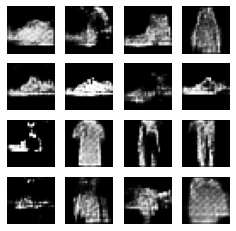

Time for training : 767 sec


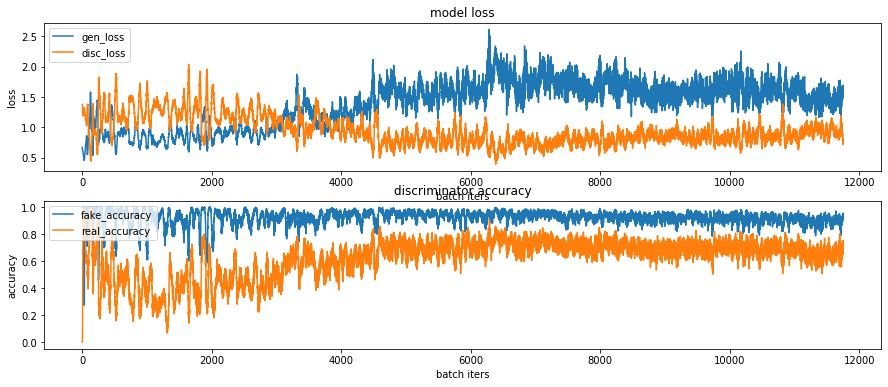

CPU times: user 6min 38s, sys: 1min 20s, total: 7min 59s
Wall time: 12min 48s


In [35]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

### 학습과정을 시각화하자

GAN이 생성한 샘플이미지들을 합쳐 GIF 파일로 만들어 저장한다.

In [36]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif

-rw-r--r-- 1 root root 1074047 Oct 28 09:36 /aiffel/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif


## 6. 프로젝트 : CIFAR-10 이미지 생성하기
GAN을 학습할 떄 고려해야 할 것들이 많다.
- 모델 구조
- 학습률
- 파라미터 초기화
- 생성자와 판별자의 경쟁관계
- 데이터의 특성 등

Fashion-MNIST 데이터를 학습했던 생성용 DCGAN 모델구조를 가지고 CIFAR-10 이미지를 학습하여 생성자 모델을 만든다.
차이점
- 크기 (28 x 28 -> 32 x 32)
- 컬러 채널 (1 -> 3)
- 입력데이터의 전체 차원이 3배 이상 증가

## cifar-10 dataset

### label

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

### 1. 모듈 임포트

In [37]:
import tensorflow
import imageio

print(tensorflow.__version__)
print(imageio.__version__)

2.6.0
2.9.0


### 2. 데이터셋 구성하기

In [38]:
cifar10 = tf.keras.datasets.cifar10

(trainc_x, _), (testc_x, _) = cifar10.load_data()

trainc_x.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

#### train_x 정규화 \[-1:1\]

In [39]:
print("max pixel:", trainc_x.max())
print("min pixel:", trainc_x.min())

max pixel: 255
min pixel: 0


In [40]:
trainc_x = (trainc_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", trainc_x.max())
print("min pixel:", trainc_x.min())

max pixel: 1.0
min pixel: -1.0


In [41]:
trainc_x.shape

(50000, 32, 32, 3)

In [42]:
trainc_x = trainc_x.reshape(trainc_x.shape[0], 32, 32, 3).astype('float32')
trainc_x.shape

(50000, 32, 32, 3)

#### 로드한 데이터 시각화

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


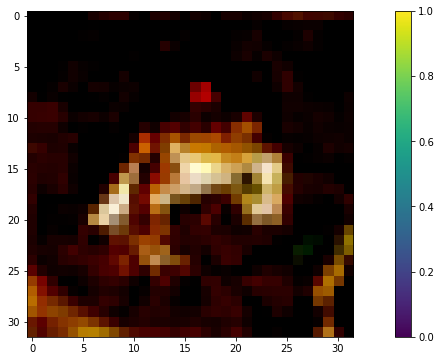

In [43]:
plt.imshow(trainc_x[0].reshape(32, 32,3)) # 32 x 32의 모양으로 이미지를 출력한다.
plt.colorbar() # plt.colorbar()는 정규화된 값들의 컬러바를 넣어준다.
plt.show()

\[-1:1\]의 구간으로 정규화 했더니 절반이 날라가버렸다.

에러에서 설명한 것처럼 RGB이미지 색상 값을 \[0:1\]의 구간으로 다시 정규화 해보겠다.

In [44]:
trainc_x = trainc_x * 127.5 +127.5 # 이미지를 [0, 255]로 정규화를 풀어줍니다.

print("max pixel:", trainc_x.max())
print("min pixel:", trainc_x.min())

max pixel: 255.0
min pixel: 0.0


In [45]:
trainc_x = trainc_x /255 # 이미지를 [0, 1]로 정규화를 풀어줍니다.

print("max pixel:", trainc_x.max())
print("min pixel:", trainc_x.min())

max pixel: 1.0
min pixel: 0.0


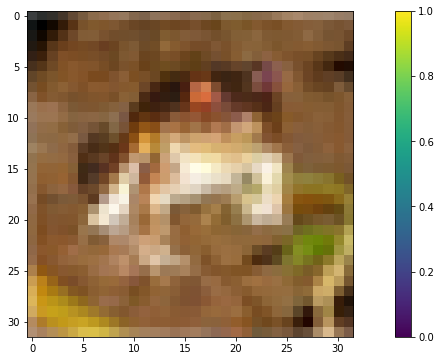

In [46]:
plt.imshow(trainc_x[0].reshape(32, 32,3)) # 32 x 32의 모양으로 이미지를 출력한다.
plt.colorbar() # plt.colorbar()는 정규화된 값들의 컬러바를 넣어준다.
plt.show()

에러가 없어지고 원래 색상으로 출력되었다.
25개를 무작위로 출력해보자.

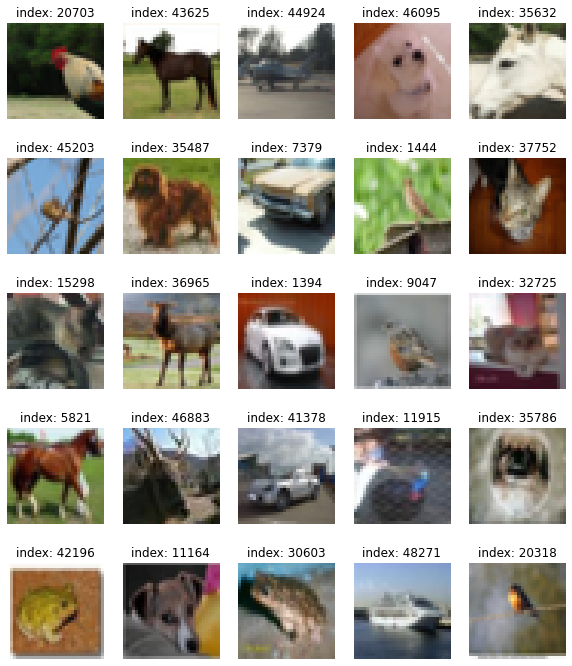

In [47]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000) # 50,000개 전체를 샘플 추출 범위 설정
    plt.imshow(trainc_x[random_index].reshape(32, 32,3))
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

#### tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하여 미니배치 데이터셋을 구성

In [48]:
BUFFER_C_SIZE = 50000 # 전체 데이터를 버퍼에 넣고 섞는다.
BATCH_C_SIZE = 256 # 256개씩 배치를 만든다.

In [49]:
trainc_dataset = tf.data.Dataset.from_tensor_slices(trainc_x).shuffle(BUFFER_C_SIZE).batch(BATCH_C_SIZE)

### 3. 생성자 모델 구현하기

32x32x3의 차원을 가진 데이터의 길이는 3,072이다.
(32,32,3)의 최종 이미지를 생성해야한다.
그전 단계에서 (16,16), (8,8)의 크기의 활성화 맵을 갖는다
기존의 컬러채널 1개였던 예제보다. 3개의 컬러채널을 가졌으니, 필터보다 3배 더 크게 해줘보겠다.
그러면 (16,16,192) <- (8,8,384) <- (8,8,768) 49,152개의 데이터 길이를 갖는다.

In [50]:
def make_c_generator_model():

    # Start
    model_c = tf.keras.Sequential()

    # First: Dense layer
    model_c.add(layers.Dense(8*8*768, use_bias=False, input_shape=(100,)))
    model_c.add(layers.BatchNormalization())
    model_c.add(layers.LeakyReLU())

    # Second: Reshape layer
    model_c.add(layers.Reshape((8, 8, 768)))

    # Third: Conv2DTranspose layer
    model_c.add(layers.Conv2DTranspose(384, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model_c.add(layers.BatchNormalization())
    model_c.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model_c.add(layers.Conv2DTranspose(192, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model_c.add(layers.BatchNormalization())
    model_c.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model_c.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model_c

In [51]:
generator_c = make_c_generator_model()

generator_c.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 49152)             4915200   
_________________________________________________________________
batch_normalization_3 (Batch (None, 49152)             196608    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 49152)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 768)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 8, 8, 384)         7372800   
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 384)         1536      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 384)        

### 노이즈를 만들어보자.

In [52]:
noise_c = tf.random.normal([1, 100])

In [53]:
generated_image_c = generator_c(noise_c, training=False)
generated_image_c.shape

TensorShape([1, 32, 32, 3])

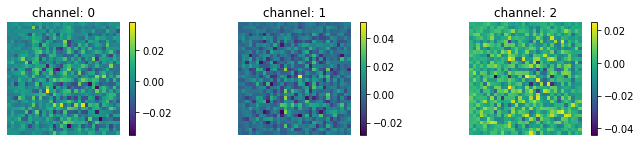

In [54]:
plt.figure(figsize=(20,12))
for i in range(3):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_image_c[0, :, :, i])
    plt.title(f'channel: {i}')
    plt.axis('off')
    plt.colorbar()
plt.show()

### 4. 구분자 모델 구현하기

In [55]:
def make_c_discriminator_model():

    # Start
    model_cd = tf.keras.Sequential()

    # First: Conv2D Layer
    model_cd.add(layers.Conv2D(192, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model_cd.add(layers.LeakyReLU())
    model_cd.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model_cd.add(layers.Conv2D(384, (5, 5), strides=(2, 2), padding='same'))
    model_cd.add(layers.LeakyReLU())
    model_cd.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model_cd.add(layers.Flatten())

    # Fourth: Dense Layer
    model_cd.add(layers.Dense(1))

    return model_cd

In [56]:
discriminator_c = make_c_discriminator_model()

discriminator_c.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 192)       14592     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 16, 16, 192)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 192)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         1843584   
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 8, 8, 384)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 384)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24576)            

In [57]:
decision_c = discriminator_c(generated_image_c, training=False)
decision_c

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00052144]], dtype=float32)>

### 5. 손실 함수와 최적화 함수 구현하기

In [58]:
cross_entropy_c = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#### 생성자 손실 함수

In [59]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

구분자 손실 함수

In [60]:
def discriminator_loss(real_output, fake_output):
    real_loss_c = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss_c = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss_c = real_loss_c + fake_loss_c
    return total_loss_c

In [61]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy_c = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy_c = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy_c, fake_accuracy_c

In [62]:
generator_optimizer_c = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer_c = tf.keras.optimizers.Adam(1e-4)

In [63]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

### 6. 훈련과정 상세 기능 구현하기

In [64]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images_c = generator_c(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output_c = discriminator_c(images, training=True)
        fake_output_c = discriminator_c(generated_images_c, training=True)

        #(6) loss 계산
        gen_loss_c = generator_loss(fake_output_c)
        disc_loss_c = discriminator_loss(real_output_c, fake_output_c)

        #(7) accuracy 계산
        real_accuracy_c, fake_accuracy_c = discriminator_accuracy(real_output_c, fake_output_c) 
    
    #(8) gradient 계산
    gradients_of_generator_c = gen_tape.gradient(gen_loss_c, generator_c.trainable_variables)
    gradients_of_discriminator_c = disc_tape.gradient(disc_loss_c, discriminator_c.trainable_variables)

    #(9) 모델 학습
    generator_optimizer_c.apply_gradients(zip(gradients_of_generator_c, generator_c.trainable_variables))
    discriminator_optimizer_c.apply_gradients(zip(gradients_of_discriminator_c, discriminator_c.trainable_variables))

    return gen_loss_c, disc_loss_c, real_accuracy_c, fake_accuracy_c  #(10) 리턴값

In [71]:
def generate_and_save_images_c(model, epoch, it, sample_seeds):

    predictions_c = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(14, 10))
    for i in range(predictions_c.shape[0]):
        plt.subplot(4, 4, i+1)
        img = np.array((predictions_c[i] * 255)).astype('uint8')
        plt.imshow(img)
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [74]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history_c(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [73]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint_c = tf.train.Checkpoint(generator_optimizer=generator_optimizer_c,
                                 discriminator_optimizer=discriminator_optimizer_c,
                                 generator=generator_c,
                                 discriminator=discriminator_c)

In [68]:
def train(dataset, epochs, save_every):
    start = time.time()
    history_c = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss_c, disc_loss_c, real_accuracy_c, fake_accuracy_c = train_step(image_batch)
            history_c['gen_loss'].append(gen_loss_c)
            history_c['disc_loss'].append(disc_loss_c)
            history_c['real_accuracy'].append(real_accuracy_c)
            history_c['fake_accuracy'].append(fake_accuracy_c)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images_c(generator_c, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images_c(generator_c, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history_c(history_c, epoch)

### 7. 학습 과정 진행하기

In [75]:
save_every = 5
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

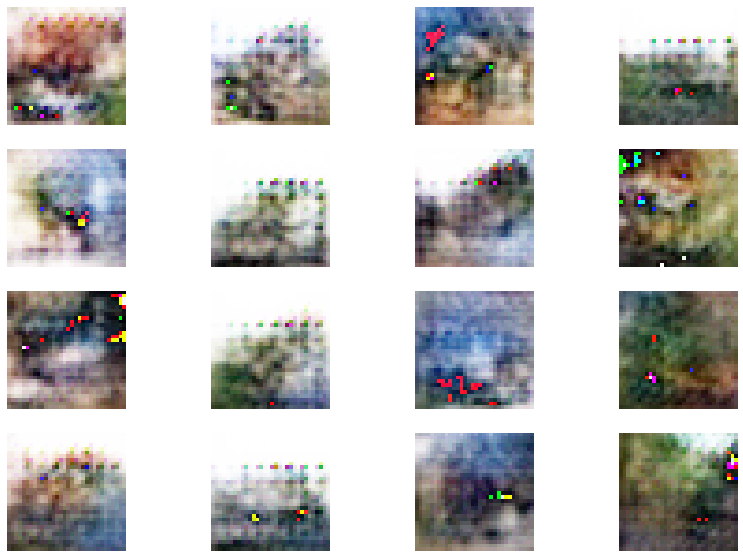

Time for training : 6835 sec


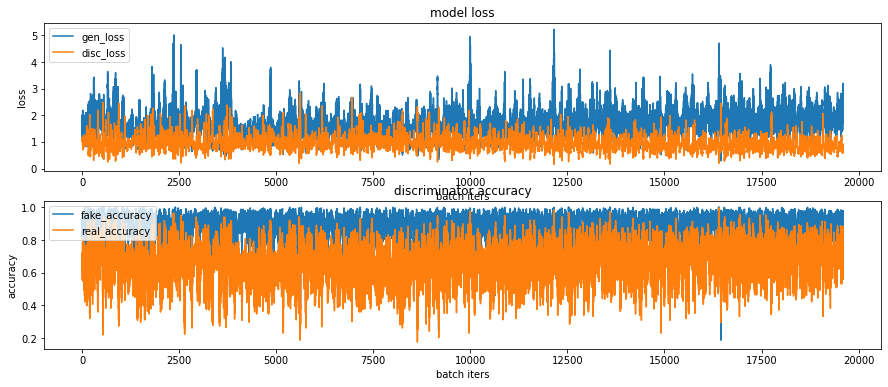

CPU times: user 1h 54min 16s, sys: 2min 8s, total: 1h 56min 24s
Wall time: 1h 53min 56s


In [76]:
%%time
train(trainc_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/cifar10/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

In [77]:
anim_c_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif

ls: cannot access '/aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif': No such file or directory


### GIF 결과
![GAN.GIF](./fashion/fashion_mnist_dcgan.gif)

## 회고
---

### 프로젝트를 하면서 어려웠던 점
- 가장 어려웠던 점은 흑백으로 예제를 통해 실습하고 컬러의 데이터에 적용하는 과정에서 채널이 증가하면서 함수를 설계하거나, 시각화하는데 헷가리는 요소들이 많아서 헤매는 경우가 많았다.
- 결과가 생각보다 좋게 나오지 않았다. 데드픽셀 같은 것들이 많았다.
- 그리고 \[-1:1\]로 정규화 했는데, 시각화 하는 과정에서 rgb는 에러가 발생했다. 내가 잘못한건지 모르겠지만, \[0:1\]의 구간으로 설정하였다.

### 프로젝트에서 학습한 내용
- 판별 모델링 외에 생성 모델링 기법들을 여러가지 다뤄보았고 관련된 논문들도 살펴봤다.
- 생성자 CNN 네트워크와 판별자 CNN 네트워크들이 서로 대립하면서 실제같은 가짜를 만들어 낸다는 것이 재미있었다.

### 개선한 내용
- 에포크 50으로 했더니 너무 알아보기 어려웠다. 100으로 올려봤는데도 식별이 불가능했다.

### 학습이 더 필요한 내용
- 지금 배운 생성모델에 대해 더 깊게 학습해보고, 다른 생성모델들도 배워봐야겠다.
- GAN을 케라스 외에도 파이토치 등의 다른 프레임워크를 이용해서도 실습해봐야겠다.